In [3]:
import requests
import bs4
import csv
from selenium import webdriver
from time import sleep
import urllib3
from lxml import etree
from selenium.webdriver.common.action_chains import ActionChains
from matplotlib import pyplot as plt
import pylab as pl

In [55]:
import pandas as pd
df=pd.read_csv('jobs_info_media.csv',encoding ='gbk') 
df=df.drop_duplicates()
df_place=df['place'].value_counts()#职位分布
df_degree=df['degree'].value_counts()
df_seniority=df['seniority'].value_counts()

In [5]:
#平均薪资
def cut_word(word,method):
    position= word.find('-')
    bottomSalary=word[:position-1]
    topSalary=word[position+1:len(word)-1]
    if method == 'bottom':
        return bottomSalary
    else:
        return topSalary
    
df['bottom']=df.yearly_salary.apply(cut_word,method ='bottom')
df['top']=df.yearly_salary.apply(cut_word,method ='top')
df.bottom=df.bottom.astype('int')
df.top=df.top.astype('int')
df['avg']=df.apply(lambda x:(x.bottom+x.top)/2,axis=1)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\tttin\AppData\Local\Temp\jieba.cache
Loading model cost 1.545 seconds.
Prefix dict has been built succesfully.


Text(0,0.5,'平均薪资')

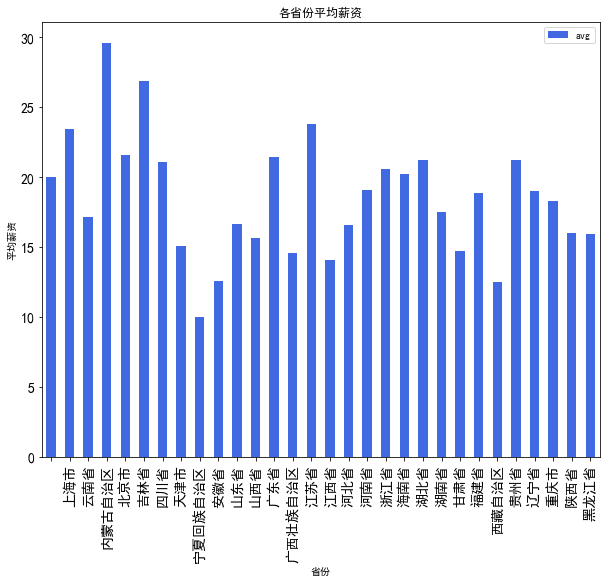

In [6]:
#所在省份
import numpy as np
location=[]
location=df['place'].tolist()
from cpca import *
df_location = transform(location,umap={})
df['province']=1
df['province']=df_location['省']

df_clean=df[['job_title','place','seniority','avg','degree','province']]

ax=df_clean.groupby('province').mean().plot(fontsize = 14,color='#4169E1',kind='bar',figsize=(10,8))
plt.rcParams['font.sans-serif']=['SimHei'] #set for displaying Chinese characters here.
plt.rcParams['axes.unicode_minus']=False 
plt.title('各省份平均薪资')
plt.xlabel('省份')
plt.ylabel('平均薪资')#set for displaying `-`

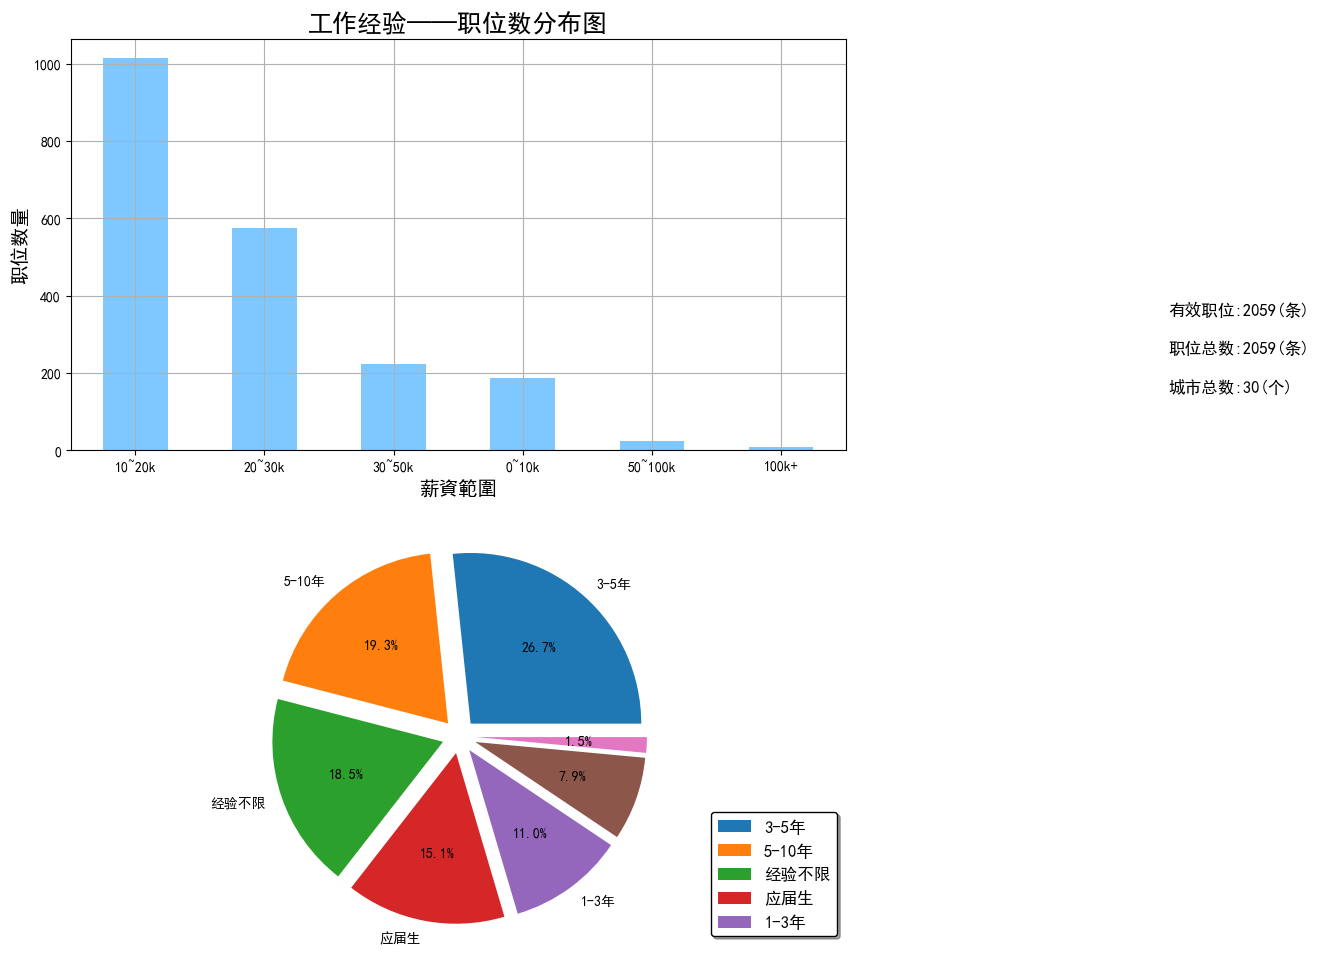

In [75]:
bins=[0,10,20,30,50,100,300]
level=['0~10k','10~20k','20~30k','30~50k','50~100k','100k+']
df_clean['level']=pd.cut(df_clean['avg'],bins=bins,labels=level)
fig2 = plt.figure(2,facecolor = 'white',figsize=(10,12),dpi=100)
ax2_1 = fig2.add_subplot(2,1,1,facecolor='white')
plt.tick_params(colors='black')

title = plt.title('工作经验——职位数分布图',fontsize = 18,color = 'black')
xlabel = plt.xlabel('薪資範圍',fontsize = 14,color = 'black')
ylabel = plt.ylabel('职位数量',fontsize = 14,color = 'black')
df_clean['level'].value_counts().plot.bar(rot = 0,color='#7fc8ff')
plt.grid(True)

#设置子图2，是位于子图1下面的饼状图
ax2_2 = fig2.add_subplot(2,1,2)

#x是数值列表，pie图的比例根据数值占整体的比例而划分
x2 = df_clean['seniority'].value_counts().values
labels = list(df_clean['seniority'].value_counts().index[:5])+ ['']*2
explode = tuple([0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.pie(x2,explode=explode,labels=labels,autopct='%1.1f%%',textprops={'color':'black'})
plt.axis('equal')#显示为等比例圆形

#设置图例，方位为右下角
legend = ax2_2.legend(loc='lower right',shadow=True,fontsize=12,edgecolor='black')

text1_ = ax2_1.text(8,150,'城市总数:30(个)',fontsize=12, color='black')
text2 = ax2_1.text(8,250,'职位总数:2059(条)',fontsize=12, color='black')
text3 = ax2_1.text(8,350,'有效职位:2059(条)',fontsize=12, color='black')


# 给毕业生的建议
对于媒体学生哪个省份的平均薪资比较高？

C:\Users\tttin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


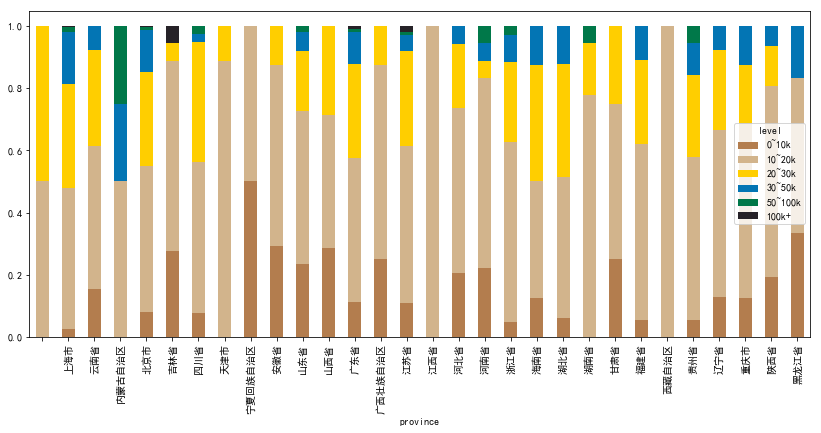

In [8]:
bins=[0,10,20,30,50,100,300]
level=['0~10k','10~20k','20~30k','30~50k','50~100k','100k+']
df_clean['level']=pd.cut(df_clean['avg'],bins=bins,labels=level)
df_level=df_clean.groupby(['province','level']).avg.count().unstack()
df_level_prop=df_level.apply(lambda x:x/x.sum(),axis=1)
ax=df_level_prop.plot.bar(stacked=True,figsize=(14,6),color=['#B37D4E','tan','#FFCE00', '#0375B4','#007849','#262228'])


各个省份对媒体人才的年资需求？

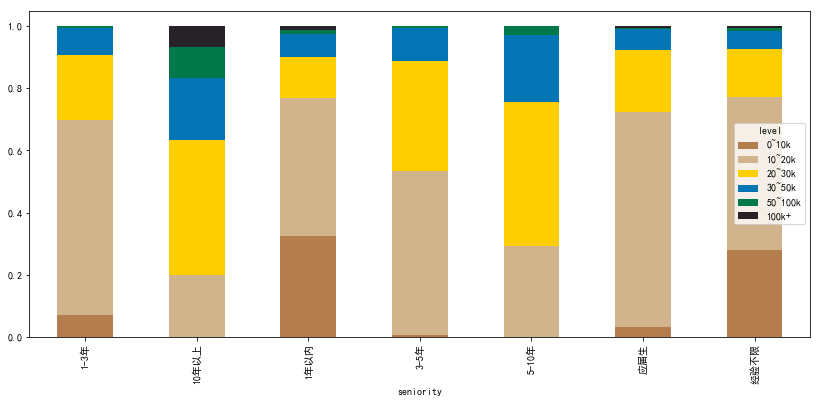

In [78]:
df_level=df_clean.groupby(['seniority','level']).seniority.count().unstack()
df_level_prop=df_level.apply(lambda x:x/x.sum(),axis=1)
ax=df_level_prop.plot.bar(stacked=True,figsize=(14,6),color=['#B37D4E','tan','#FFCE00', '#0375B4','#007849','#262228'])

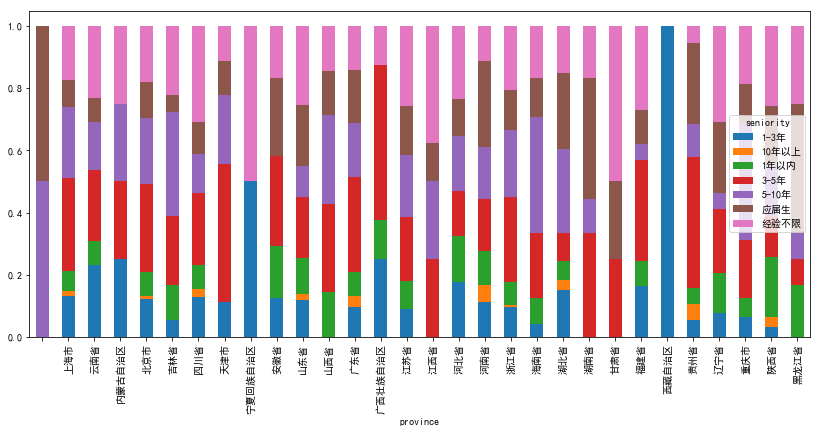

In [81]:
df_level=df_clean.groupby(['province','seniority']).seniority.count().unstack()
df_level_prop=df_level.apply(lambda x:x/x.sum(),axis=1)
ax=df_level_prop.plot.bar(stacked=True,figsize=(14,6))

一般媒体学生可从事的行业的职务要求？

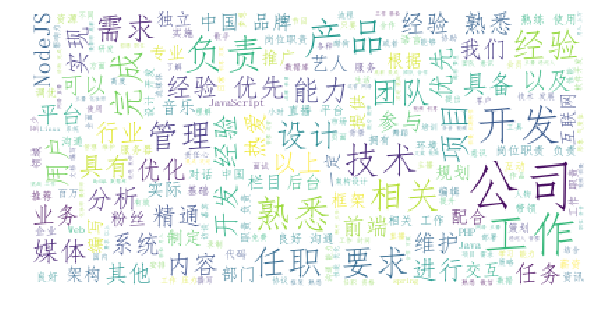

In [20]:
import jieba
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#定义一个空字符串
final = ""
#文件夹位置
filename = r"jobs.txt"
 
#打开文件夹，读取内容，并进行分词
with open(filename,'r',encoding = 'gb2312') as f:
    for line in f.readlines():
        word = jieba.cut(line)
        for i in word:
            final = final + i +" "
word_pic = WordCloud(background_color="white",
                     font_path = r'C:\Windows\Fonts\simfang.ttf',
                     max_words=500,
                     max_font_size=40, 
                     random_state=40).generate(final)
plt.figure(figsize=(10, 8))
plt.imshow(word_pic)
#去掉坐标轴
plt.axis('off')
#保存图片到相应文件夹
plt.show
word_pic.to_file('description.png')